# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | lima
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | moussoro
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | manatutu
City not found. Skipping...
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hailar
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | la punta
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | san antonio de pale
Processing Record 17 of Set 1 | nizhniy odes
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | nianzishan
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | sitka
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,51.93,86,41,4.94,AU,1734193000
1,lima,-12.0432,-77.0282,70.05,68,75,5.75,PE,1734192928
2,moussoro,13.6408,16.4901,84.81,10,18,16.33,TD,1734193003
3,ilulissat,69.2167,-51.1000,19.42,68,40,8.05,GL,1734193004
4,waitangi,-43.9535,-176.5597,61.83,95,97,5.99,NZ,1734193007


In [6]:
import os

# Create output directory if it does not exist
if not os.path.exists("output_data"):
	os.makedirs("output_data")

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,51.93,86,41,4.94,AU,1734193000
1,lima,-12.0432,-77.0282,70.05,68,75,5.75,PE,1734192928
2,moussoro,13.6408,16.4901,84.81,10,18,16.33,TD,1734193003
3,ilulissat,69.2167,-51.1000,19.42,68,40,8.05,GL,1734193004
4,waitangi,-43.9535,-176.5597,61.83,95,97,5.99,NZ,1734193007


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

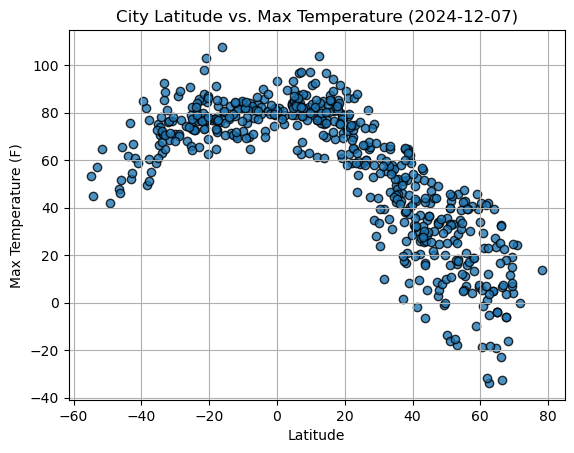

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-12-07)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

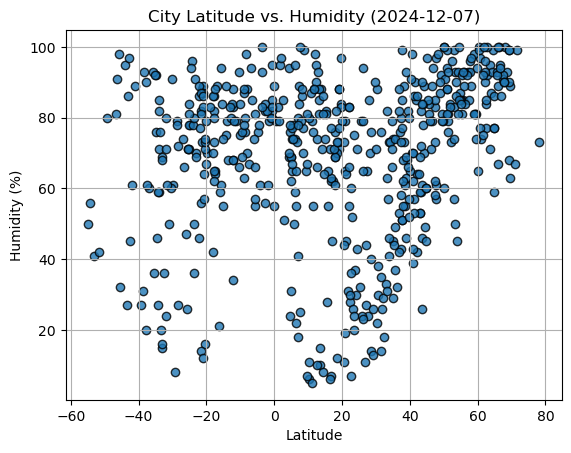

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-12-07)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

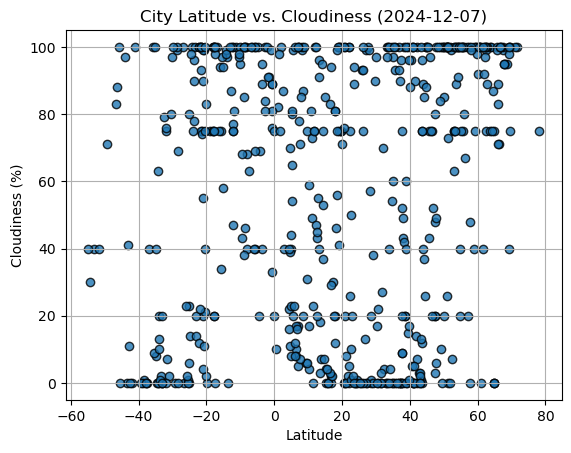

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-12-07)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

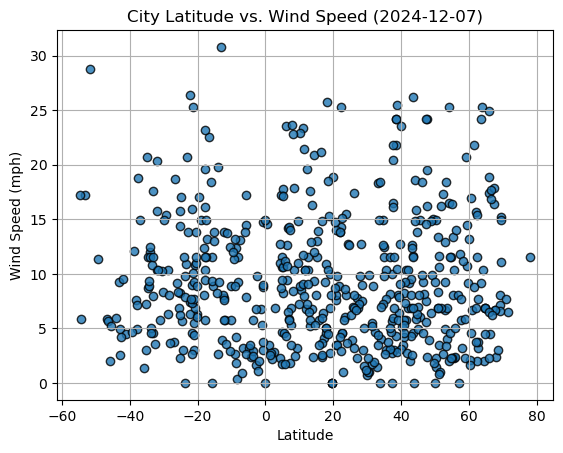

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-12-07)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-squared is: {rvalue}")
    return slope, intercept


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,moussoro,13.6408,16.4901,84.81,10,18,16.33,TD,1734193003
3,ilulissat,69.2167,-51.1000,19.42,68,40,8.05,GL,1734193004
5,yellowknife,62.4560,-114.3525,-5.28,77,75,11.50,CA,1734193008
6,hailar,49.2000,119.7000,-0.92,92,10,9.89,CN,1734193009
7,iqaluit,63.7506,-68.5145,4.73,71,75,24.16,CA,1734193010


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,51.93,86,41,4.94,AU,1734193000
1,lima,-12.0432,-77.0282,70.05,68,75,5.75,PE,1734192928
4,waitangi,-43.9535,-176.5597,61.83,95,97,5.99,NZ,1734193007
8,grytviken,-54.2811,-36.5092,45.00,56,30,5.86,GS,1734193011
10,la punta,-33.1837,-66.3127,85.44,15,0,4.54,AR,1734193013


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8699582428437661


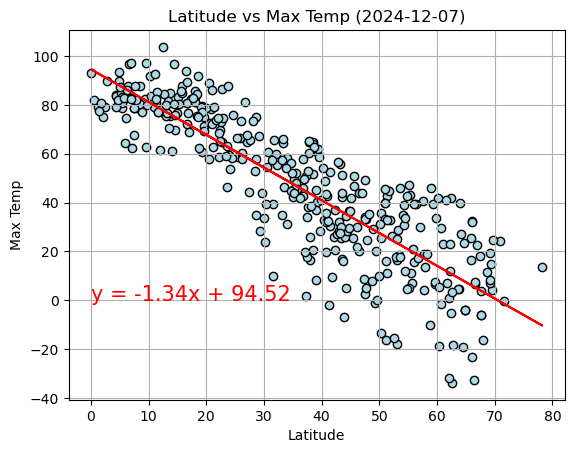

In [15]:
# Linear regression on Northern Hemisphere
slope, intercept = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude vs Max Temp", (10, 20))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], color='lightblue', edgecolors='black')
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (0, 0), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp (2024-12-07)')
plt.grid(True)
plt.show()

The r-squared is: 0.5628071731857576


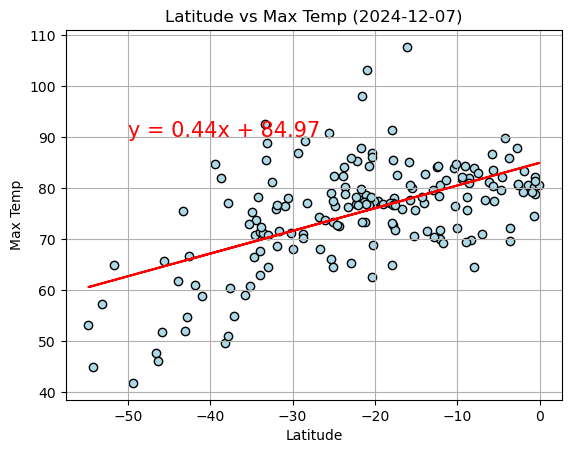

In [16]:
# Linear regression on Southern Hemisphere
slope, intercept = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude vs Max Temp", (-50, 90))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], color='lightblue', edgecolors='black')
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (-50, 90), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp (2024-12-07)')
plt.grid(True)
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.36538746813631406


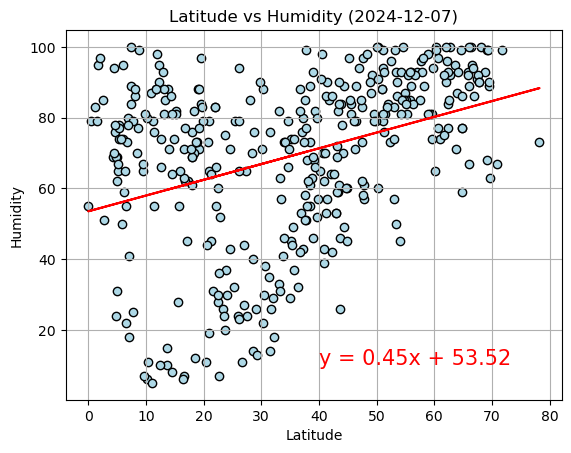

In [23]:
# Northern Hemisphere
slope, intercept = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude vs Humidity", (40, 10))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], color='lightblue', edgecolors='black')
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (40, 10), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (2024-12-07)')
plt.grid(True)
plt.show()


The r-squared is: 0.29013479138876536


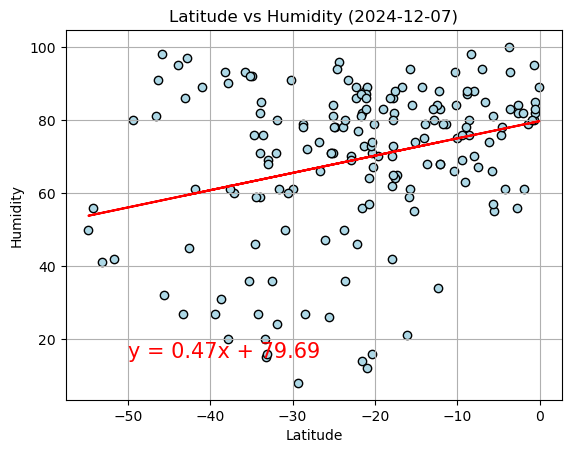

In [24]:
# Southern Hemisphere
slope, intercept = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude vs Humidity", (-50, 15))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], color='lightblue', edgecolors='black')
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (-50, 15), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (2024-12-07)')
plt.grid(True)
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.29343271147005584


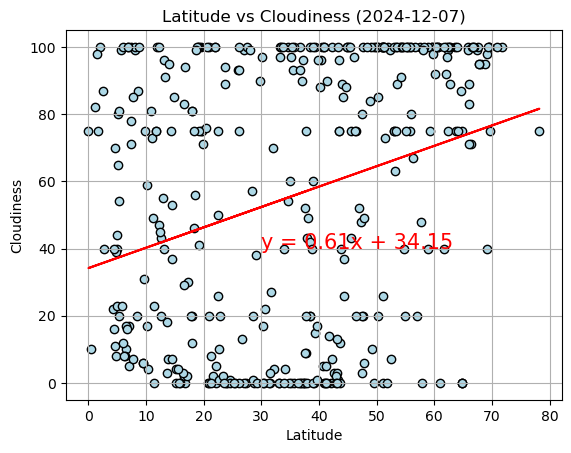

In [25]:
# Northern Hemisphere
slope, intercept = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude vs Cloudiness", (30, 40))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], color='lightblue', edgecolors='black')
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (30, 40), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness (2024-12-07)')
plt.grid(True)
plt.show()


The r-squared is: 0.4148410558108956


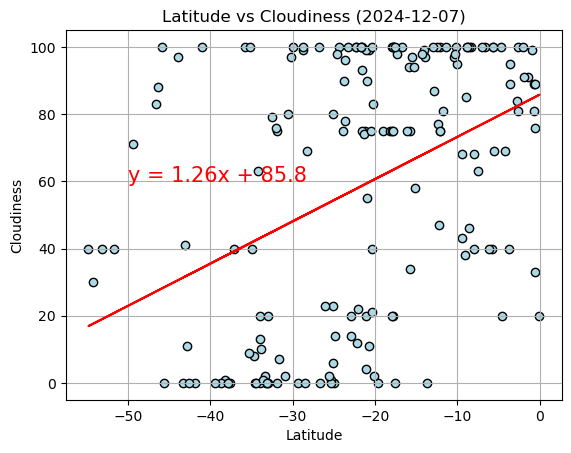

In [26]:
# Southern Hemisphere
slope, intercept = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude vs Cloudiness", (-50, 60))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], color='lightblue', edgecolors='black')
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (-50, 60), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness (2024-12-07)')
plt.grid(True)
plt.show()


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004228860413775165


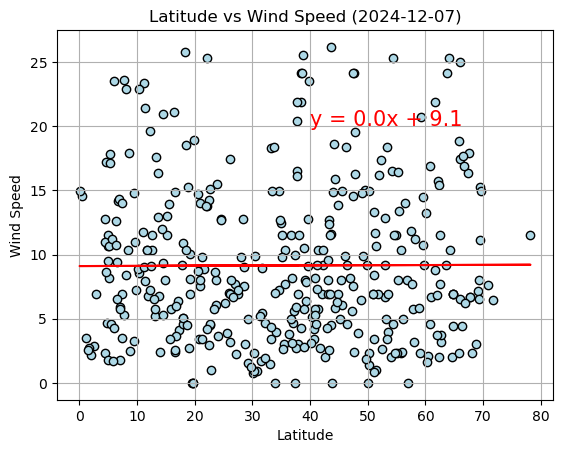

In [27]:
# Northern Hemisphere
slope, intercept = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude vs Wind Speed", (40, 20))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], color='lightblue', edgecolors='black')
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (40, 20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (2024-12-07)')
plt.grid(True)
plt.show()

The r-squared is: -0.13553070605450085


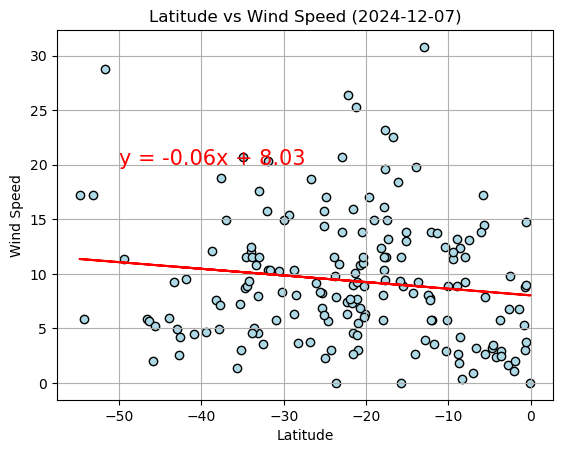

In [28]:
# Southern Hemisphere
slope, intercept = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude vs Wind Speed", (-50, 20))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], color='lightblue', edgecolors='black')
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color='red')
plt.annotate(line_eq, (-50, 20), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (2024-12-07)')
plt.grid(True)
plt.show()
